## Historical Data about the olympics
This dataset is about the olympics from 1896 to 2016. The data is in csv format and the data is downloaded from 
https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [63]:
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
#--------------------------------------------#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# option for pandas to display the columns
pd.options.display.max_columns=30

# setting the notebook mode for plotly

init_notebook_mode(connected=True)
cf.go_offline(connected=True)

# setting theme in cufflinks

cf.set_config_file(theme="pearl")


In [32]:
data = pd.read_csv('athlete_events.csv')

## Data Description

The data consists of :
- ID: unique value for each row
- Name: Names of the participant
- Sex: Male or Female
- Age: Age of the participant
- Height: Height of the participant
- Weight: Weight of the participant
- Team: Team they played for
- NOC: National Olympic Committee 3-letter code
- Games: Year and season
- Year: Integer
- Season: Summer or Winter
- City:Host city
- Sport: Sport
- Event: Event
- Medal: Gold, Silver, Bronze, or NA


In [33]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### First few data of the dataframe

In [35]:
data['Medal']=data['Medal'].fillna('NA')
data.drop(columns=['City','Event'], inplace=True)

In [36]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,Sport,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Basketball,NA
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,Judo,NA
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Football,NA
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Speed Skating,NA


### Statistical Info

In [37]:
statistics = data.drop_duplicates(subset='ID')

In [38]:
statistics.drop(columns=['ID','Height','Weight','NOC','Year','Season'],inplace=True)

In [39]:
table = statistics.nlargest(10,'Age')

In [40]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(table.columns),
               fill_color = 'paleturquoise',
               align='left'),
    cells = dict(values=[table.Name, table.Sex,table.Age, table.Team,table.Games,table.Sport,table.Medal],
                fill_color='lavender',
                align='left'))
                     ])
fig.update_layout(dict(title='Oldest Participants in the Olympics'),title_x=0.5)
fig.show()

In [41]:
table = statistics.nsmallest(10,'Age')

In [42]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(table.columns),
               fill_color = 'paleturquoise',
               align='left'),
    cells = dict(values=[table.Name, table.Sex,table.Age, table.Team,table.Games,table.Sport,table.Medal],
                fill_color='lavender',
                align='left'))
                     ])
fig.update_layout(title='Youngest Participants in the Olympics',title_x=0.5)
fig.show()

In [43]:

table_pop =data['Team'].value_counts().nlargest(10)

In [44]:
table = pd.DataFrame(table_pop).reset_index()

In [45]:
table = table.rename(columns={'index':'country','Team':'Total'
                     
                     })

In [46]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['country','Total number of Participants'],
               fill_color = 'paleturquoise',
               align='left'),
    cells = dict(values=[table.country, table.Total],
                fill_color='lavender',
                align='left'))
                     ])
fig.update_layout(title='Largest Number Of Participants in the Olympics',title_x=0.5)
fig.show()

In [47]:
data_medal=data.groupby('Medal')['NOC'].value_counts()

In [48]:
data_meda_1 = pd.DataFrame(data.groupby(['Medal','NOC']).Medal.count()).unstack().T

In [49]:
data_meda_1.drop(columns='NA',inplace=True)

#### pandas styling 
#####  Top 10 countries according to the gold received

In [50]:
import seaborn as sns
cm = sns.light_palette("yellow", as_cmap=True)

s = data_meda_1.nlargest(10, columns='Gold').style.background_gradient(cmap=cm,axis=0).highlight_null('#d65f5f').highlight_max()
s

## Number of Athletes

In [54]:
data1 = data.groupby(['Year'])['Season'].value_counts()

In [55]:
data1.head()

Year  Season
1896  Summer     380
1900  Summer    1936
1904  Summer    1301
1906  Summer    1733
1908  Summer    3101
Name: Season, dtype: int64

In [56]:
data2 = pd.DataFrame(data={'Athlets': data1.values}, index = data1.index).reset_index()

In [66]:
fig  =  go.Figure()

fig.add_trace(go.Scatter(x=data2['Year'], y = data2['Athlets'], mode='markers'))
fig.update_layout(dict(title='Number of Athltes per year',title_x=0.5, xaxis=dict(title='Year'), yaxis=dict(title='Number of athletes')))
fig.show()

From the plot above we can see that the number of athletes have gradually increased with years and since there are summer and winter olympics and winter olympics have comparatively less number of participants so there seems to be two lines of data.

In [67]:
fig = px.line(data2, x="Year", y="Athlets", color='Season')
fig.show()

From this plot we can see that summer olympic games started earlier than the winter games and the number of players participating in the winter games are fewer than summer, except for 1956 and 1932 summer olympics which had significantly less participant.Summer olympics in 1956 was held two times, one in Melbourne, Australia and another in Stockholm, Sweden. According to a source in google, many countries boycotted the Melbourne olympics as it was too far and it was the first olympics to be held in the southern hemisphere.

## Number of events per olympic games

In [80]:
data1 = data.groupby(['Year','Season'])['Sport'].nunique()


In [84]:
data_sport = pd.DataFrame(data={'Sports': data1.values}, index=data1.index)
data_sport.reset_index(inplace=True)


In [85]:
fig = px.bar(data_sport, x ='Year', y='Sports', color='Season' ,width=1200)
fig.update_layout(title='Number of Games per Olympic',title_x=0.5 )
fig.show()

From the char above we can see that the number of games have increased gradually for the summer and winter olympics, but has remained quite same for the last 5 olympics and same goes to the winter olympics as well. And also, interesting thing to notice is that until 1992, both summer and winter olympic games were held in the same year but it has changed after that.

## Average Age of Athletes

In [93]:
data_average_age = data.pivot_table(index='Year',columns='Season', values='Age')
data_average_age.reset_index(inplace=True)

None


In [98]:
fig  =  go.Figure()
fig.add_trace(go.Bar(x=data_average_age['Year'], y = data_average_age['Summer'], name='Summer'))
fig.add_trace(go.Bar(x=data_average_age['Year'], y = data_average_age['Winter'], name='Winter'))

fig.update_layout(dict(title='Average Age of Athletes',width=1800, xaxis=dict(title='Year'), yaxis=dict(title='Age')))
fig.show()

The average age of participants as been around 23-25 for most of the olympics.

## Female and Male participation according to the games

In [100]:
data_1= data.groupby(['Sport'])['Sex'].value_counts()
data_sex1 = pd.DataFrame(data={'Sex_count': data_1.values}, index=data_1.index)
data_sex1.reset_index(inplace=True)
data_sex1_pivot = pd.pivot_table(data_sex1, columns='Sex', index='Sport', values='Sex_count')
data_sex1_pivot.reset_index(inplace = True)
data_sex1_pivot.fillna(0,inplace=True)


In [101]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = data_sex1_pivot['Sport'],
    y = data_sex1_pivot['F'],
    name='Female',
    marker_color='#ff0000'
))
fig.add_trace(go.Bar(
    x = data_sex1_pivot['Sport'],
    y = data_sex1_pivot['M'],
    name='Male',
    marker_color='lightsalmon'
))

fig.update_layout(title_text='Female vs Male in different sports',barmode='stack', xaxis_tickfont_size=9,
                 )
fig.show()

From the above figure, it could be clearly seen that there are more number of players that participates in athleticsw, Gymnatics and Swimming respectively. Theere are more events in these sports as well. This data analysis has not focused on particular events of each sports so it could not be proved here.

## Medals

In [102]:
data4 = data.groupby(['NOC'])['Medal'].value_counts()

In [106]:
data_medal = pd.DataFrame(data={'Medals': data4.values}, index=data4.index).unstack()

In [110]:
data_medal.reset_index(inplace=True)

In [111]:
data_medal.columns = data_medal.columns.get_level_values(1)

In [112]:
data_medal.rename(columns = {'':'NOC'}, inplace = True) 

In [118]:
fig  =  go.Figure()
fig.add_trace(go.Bar(x=data_medal['NOC'], y = data_medal['Bronze'], name='Bronze ', marker_color = 'brown'))
fig.add_trace(go.Bar(x=data_medal['NOC'], y = data_medal['Silver'], name='Silver ', marker_color='blue'))
fig.add_trace(go.Bar(x=data_medal['NOC'], y = data_medal['Gold'], name='Gold ', marker_color='yellow'))
fig.update_layout(dict(barmode='relative'),dict(title='Medals per country', xaxis=dict(title='Countries'), yaxis=dict(title='Number of Medals')))
fig.show()


From the chat above we can see that the USA have dominated the olympic medals. They have the highest number of golds(2638), silver(1641) and bronze (1358) among all the countries for the olympics since the start.

## Latest Olympic

In [128]:
data_latest = (data[data['Year']==2016])

In [130]:
data_latest.reset_index(inplace=True)

In [133]:
data_latest = data_latest.drop(columns='index')

In [134]:
data_latest.isnull().sum()

ID          0
Name        0
Sex         0
Age         0
Height    176
Weight    223
Team        0
NOC         0
Games       0
Year        0
Season      0
Sport       0
Medal       0
dtype: int64

### Female and Male

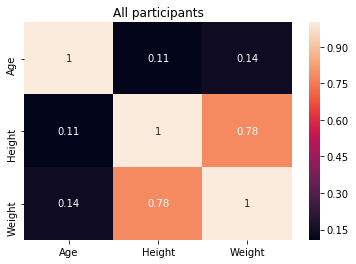

In [135]:
sns.heatmap(data_latest.loc[:,['Age','Height','Weight']].corr(), annot=True)
plt.title('All participants')
plt.show()

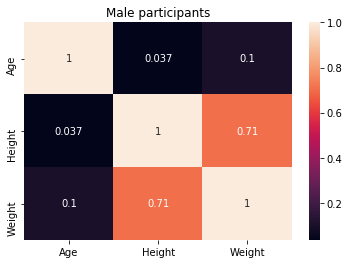

In [136]:
sns.heatmap(data_latest[data_latest['Sex']== 'M'][['Age','Height','Weight']].corr(), annot=True)
plt.title('Male participants')
plt.show()

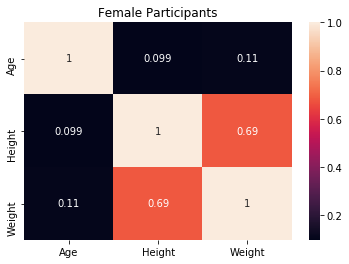

In [137]:
sns.heatmap(data_latest[data_latest['Sex']== 'F'][['Age','Height','Weight']].corr(), annot=True)
plt.title('Female Participants')
plt.show()

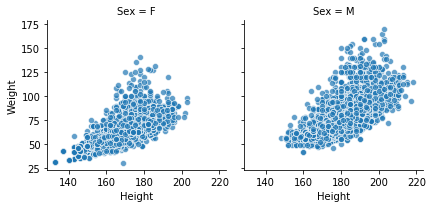

In [138]:
g = sns.FacetGrid(data_latest, col="Sex")
g.map(sns.scatterplot, "Height", "Weight", alpha=.7)
g.add_legend()

plt.show()

From all the plots, we can see that height and weight are correlated with each other which is very easy to understand. The 
scatter plot explains that the average height of the men is more than the average height of female so we need to keep this in mind
when we are filling the nan value in height and weight

In [139]:
data_latest.describe()

,ID,Age,Height,Weight,Year
count,13688.000000,13688.000000,13512.000000,13465.000000,13688.0
mean,68145.304135,26.207919,176.034266,70.988637,2016.0
std,39735.448448,5.560367,11.440259,15.715083,0.0
min,22.000000,13.000000,133.000000,30.000000,2016.0
25%,33079.000000,22.000000,168.000000,60.000000,2016.0
50%,69360.000000,26.000000,175.000000,69.000000,2016.0
75%,102201.000000,29.000000,184.000000,80.000000,2016.0
max,135568.000000,62.000000,218.000000,170.000000,2016.0


In [140]:
height_mean_male = data_latest['Height'].where(data_latest['Sex']=='M').mean()
height_mean_female = data_latest['Height'].where(data_latest['Sex']=='M').mean()
weight_mean_male = data_latest['Weight'].where(data_latest['Sex']=='M').mean()
weight_mean_female = data_latest['Weight'].where(data_latest['Sex']=='F').mean()

In [141]:
data_latest.loc[(data_latest['Sex']=='M') & (np.isnan(data_latest['Height'])),'Height']= height_mean_male
data_latest.loc[(data_latest['Sex']=='M') & (np.isnan(data_latest['Weight'])),'Weight']= weight_mean_male
data_latest.loc[(data_latest['Sex']=='F') & (np.isnan(data_latest['Height'])),'Height']= height_mean_female
data_latest.loc[(data_latest['Sex']=='F') & (np.isnan(data_latest['Weight'])),'Weight']= weight_mean_female

In [142]:
data_latest.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
Sport     0
Medal     0
dtype: int64

In [143]:
data_latest['Team'].unique()

array(['Romania', 'Spain', 'Italy', 'Azerbaijan', 'France', 'Algeria',
       'Bahrain', 'Netherlands', 'Iraq', 'Ireland', 'United States',
       'Egypt', 'Iran', 'Belgium', 'Cameroon', 'Kazakhstan', 'Brunei',
       'Uzbekistan', 'Tajikistan', 'Russia', 'Canada', 'Germany',
       'Mexico', 'Ethiopia', 'Sri Lanka', 'Armenia', 'Kenya', 'Nigeria',
       'Brazil', 'Australia', 'Chile', 'Switzerland', 'Belarus', 'Guyana',
       'Georgia', 'Portugal', 'Colombia', 'Djibouti', 'Jordan',
       'Palestine', 'Saudi Arabia', 'India', 'Ghana', 'Honduras',
       'El Salvador', 'Venezuela', 'Argentina', 'Turkmenistan', 'Japan',
       'Saint Kitts and Nevis', 'Great Britain', 'New Zealand', 'Turkey',
       'Eritrea', 'Uganda', 'Mongolia', 'Lithuania', 'Namibia',
       'Kyrgyzstan', 'Puerto Rico', 'Malaysia', 'Samoa', 'Angola',
       'South Africa', 'Greece', 'Norway', 'Cuba', 'Paraguay',
       'Indonesia', 'Indonesia-1', 'Bangladesh', "Cote d'Ivoire",
       'Trinidad and Tobago', 'China',

In [144]:
data_latest['Team'] = data_latest['Team'].str.split('-').str.get(0)

In [146]:
import plotly.express as px
fig = px.box(data_latest, x="Age", color="Sex",
             notched=True, # used notched shape
             title="Box plot of Age of Male and Female",
             hover_data=["Name"]
            )
fig.show()

In [183]:
fig=px.scatter(data_latest, x='Height',y='Weight', size='Age',color='NOC', hover_name='Name', size_max=30)
fig.show()

#### Games

In [184]:
data_latest_1= data_latest.groupby(['Sport'])['Sex'].value_counts()

In [185]:
data_sex = pd.DataFrame(data={'Sex_count': data_latest_1.values}, index=data_latest_1.index)

In [186]:
data_sex.reset_index(inplace=True)

In [187]:
data_sex_pivot = pd.pivot_table(data_sex, columns='Sex', index='Sport', values='Sex_count')

In [188]:
data_sex_pivot.reset_index(inplace = True)
data_sex_pivot.fillna(0,inplace=True)

In [190]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = data_sex_pivot['Sport'],
    y = data_sex_pivot['F'],
    name='Female',
    marker_color='#ff0000'
))
fig.add_trace(go.Bar(
    x = data_sex_pivot['Sport'],
    y = data_sex_pivot['M'],
    name='Male',
    marker_color='lightsalmon'
))
fig.update_layout(title_text='Female vs Male in different sports in 2016 Olympics')
fig.show()

The barchart shows the number of male and female participating in different sports

### Top 20 countries

In [191]:
data_latest1 = data_latest['Team'].value_counts()
data_latest_1 = pd.DataFrame(data_latest1)
data_latest_1.reset_index(inplace=True)
data_latest_1 = data_latest_1.rename(columns={'index':'country', 'Team':'count'})
data_latest_1.head()

,country,count
0,United States,719
1,Brazil,583
2,Germany,536
3,Australia,518
4,France,512


In [192]:
data_latest_1[0:20].iplot(kind="pie",
         labels = "country",
         values="count",
         colorscale="accent",
         title = "Pie Chart of top 20 country by participants"
         )